# Project Description - Bank Churn Prediction

# Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

# Data Dictionary:

- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

# Points Distribution:

The points distribution for this case is as follows:

- 1. Read the dataset
- 2. Drop the columns which are unique for all users like IDs (5 points)
- 3. Perform bivariate analysis and give your insights from the same (5 points) 
- 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
- 5. Normalize the train and test data (10 points)
- 6. Initialize & build the model. Identify the points of improvement and implement the same. (20 points)
- 7. Predict the results using 0.5 as a threshold (10 points)
- 8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

#Seaborn for visualization
import seaborn as sns

#store elements as dictionary keys and their counts as dictionary values
from collections import Counter

#scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler

#Classification metrics
from sklearn.metrics import confusion_matrix, classification_report,precision_score, recall_score, f1_score, precision_recall_curve, auc

#Keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


### 1) Read the dataset

In [2]:
#Import Dataset

#Read the excel file
BCP_DF = pd.read_csv('bank.csv')

In [3]:
BCP_DF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Univariate analysis

#Prints information about the dataset
BCP_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Shape of data frame
BCP_DF.shape

(10000, 14)

In [6]:
#First 15 rows
BCP_DF.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
#Last 15 rows
BCP_DF.tail(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9988,9989,15589329,Pirozzi,775,France,Male,30,4,0.00,2,1,0,49337.84,0
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0


In [8]:
#Number of unique values in each column
BCP_DF.nunique() 

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
#Check Null values
BCP_DF.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Check NA values
BCP_DF.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 2) Drop the columns which are unique for all users like IDs (5 points)

In [11]:
#Drop the columns which are unique
BCP_DF.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"New dataframe dimensions: {BCP_DF.shape}")
BCP_DF.head(15)

New dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### 3) Perform bivariate analysis and give your insights from the same (5 points)

In [12]:
#Statistical summary
BCP_DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [13]:
#Summary of categorical features
BCP_DF.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


#### From the above we can say that there are more males than females and France is most common of the three countries.

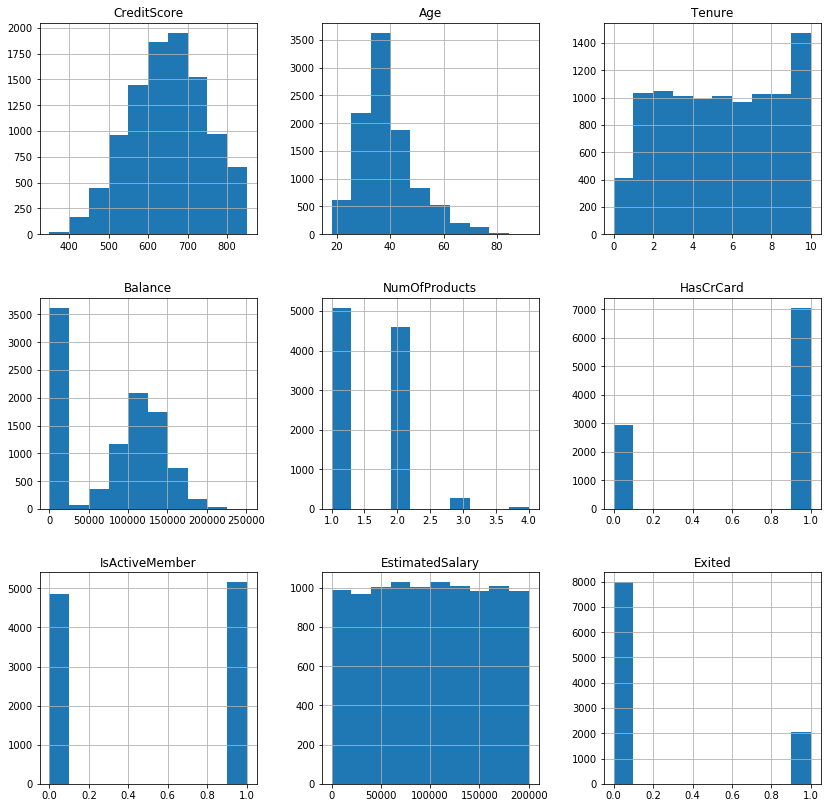

In [14]:
#Check dataset histogram plot
BCP_DF.hist(figsize=(14,14))

plt.show()

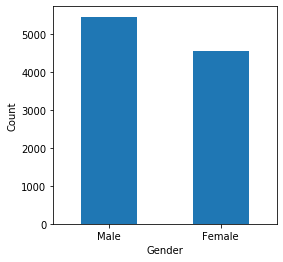

There are more males than females.


In [15]:
#let's analyze Gender 

plt.figure(figsize=(4,4))
BCP_DF['Gender'].value_counts().plot.bar()
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

print('There are more males than females.')

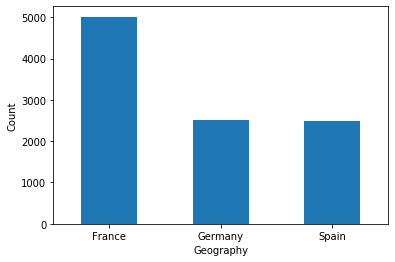

There are more customers from France,followed by Germany and Spain


In [16]:
#let's analyzer Geography

plt.figure(figsize=(6,4))
BCP_DF['Geography'].value_counts().plot.bar()
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()
print('There are more customers from France,followed by Germany and Spain')

### Churn segmentation by gender

In [17]:
#Calculate Exited by gender and display the frequency and percentage

group_G_DF = BCP_DF.groupby('Gender')['Exited'].agg(Count='value_counts').groupby(level=[0]).apply(lambda s: round(s * 100 / s.sum(), 2))
group_G_DF.rename(columns={'Count': 'Percentage'}, inplace=True)
group_G_DF

Percentage
Gender Exited            
Female 0            74.93
       1            25.07
Male   0            83.54
       1            16.46

In [18]:
#Rearrange the dataframe for plotting percentage
group_G_DF = group_G_DF.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
group_G_DF

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


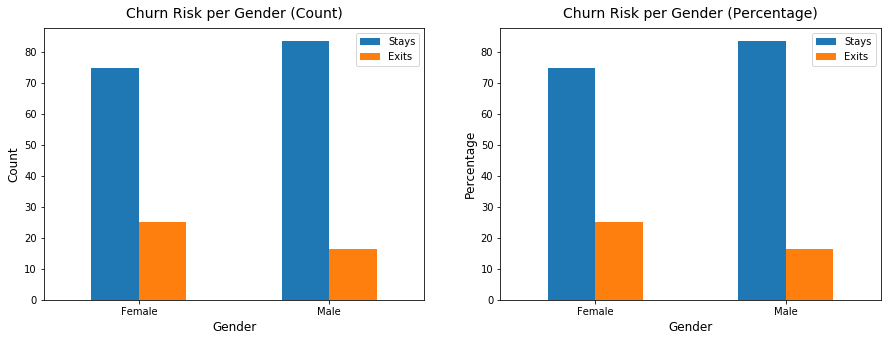

In [19]:
#Display bar plot for churn risk per gender
labels= ['Stays', 'Exits']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#Count
group_G_DF.plot(kind='bar',rot=0, ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)

#Percentage
group_G_DF.plot(kind='bar',rot=0, ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)

plt.show()

#### As seen above plot the percentage of females are more likely to leave the bank i.e. 25% comparing to 16% males

### Churn Segmentation by Geography

In [20]:
#Calculate Exited by geography and display the frequency and percentage

group_GG_DF = BCP_DF.groupby('Geography')['Exited'].agg(Count='value_counts').groupby(level=[0]).apply(lambda s: round(s * 100 / s.sum(), 2))
group_GG_DF.rename(columns={'Count': 'Percentage'}, inplace=True)
group_GG_DF

Percentage
Geography Exited            
France    0            83.85
          1            16.15
Germany   0            67.56
          1            32.44
Spain     0            83.33
          1            16.67

In [21]:
#Rearrange the dataframe for plotting percentage
group_GG_DF = group_GG_DF.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
group_GG_DF

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


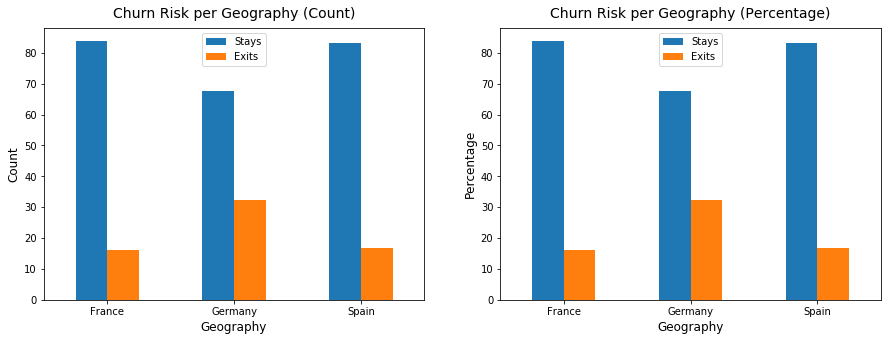

In [22]:
#Display bar plot for churn risk per Geography

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#Count
group_GG_DF.plot(kind='bar',rot=0, ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)

#Percentage
group_GG_DF.plot(kind='bar',rot=0, ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)

plt.show()

#### As per above plot the smallest number of customers are from Germany but they are most likely to leave the bank.

In [23]:
#Calculate correlations between numeric features
correlations = BCP_DF.corr()

#Correlations features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.025651,0.009612,1.000000


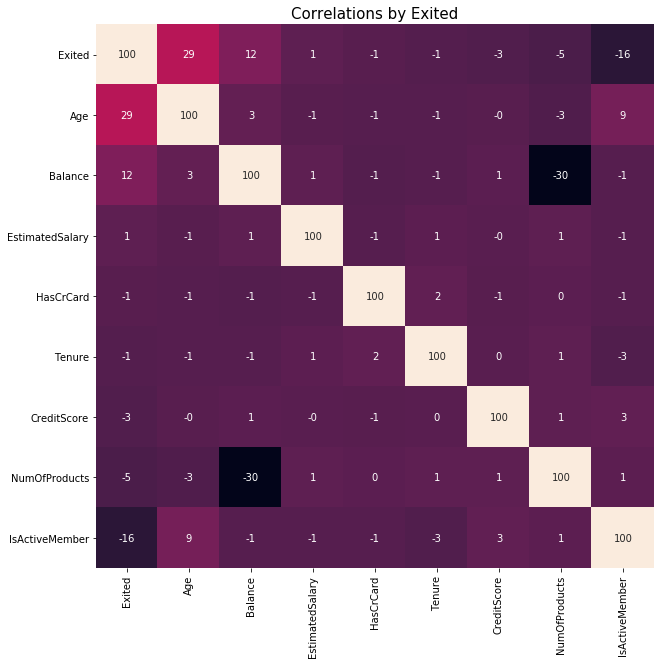

In [24]:
#Plot heatmap to see the correlations
plt.figure(figsize=(10,10))
sns.heatmap(sort_corr*100, annot=True,fmt='.0f',cbar=False)
plt.title('Correlations by Exited', fontsize=15)
plt.yticks(rotation=0)
plt.show()

#### In general, weak correlations observed:
- Weak positive correlation with age, 
- Weak positive correlation with balance
- Weak negative correlations with number of products and membership.

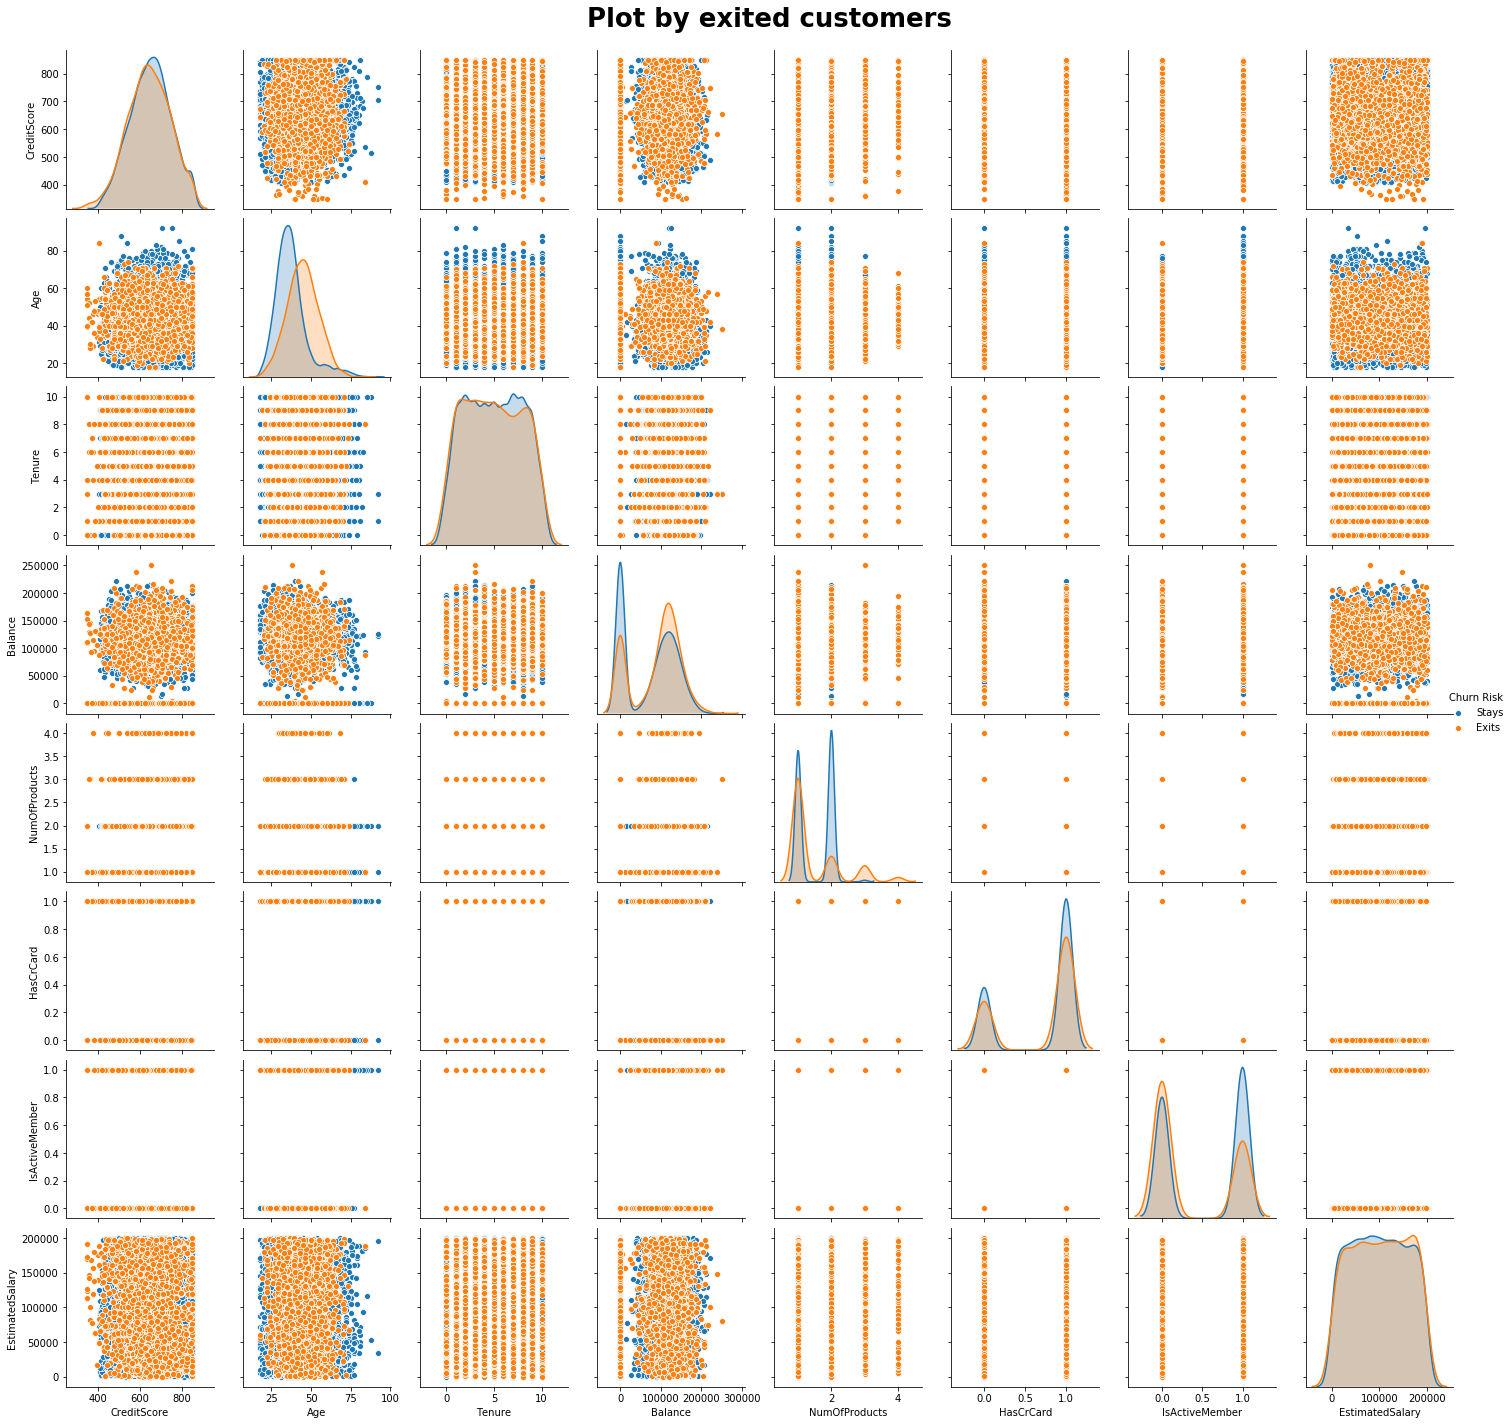

In [25]:
#Show pairplot
g = sns.pairplot(BCP_DF, hue='Exited')

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by exited customers', fontsize=26, fontweight='bold')

new_title = 'Churn Risk'
g._legend.set_title(new_title)

new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

#### From above plot we can see that only few features have slightly different distributions. i.e. from the density plot for age, it could be seen that older people have slightly higher tendency to leave the bank.

### 4) Distinguish the feature and target set and divide the data set into training and test sets (5 points)

#### One Hot Encoding

In [26]:
features =  BCP_DF.iloc[:, 0:10]
target = BCP_DF.iloc[:,10]

print('Shape', BCP_DF.shape)
print('Features', features.shape)
print('Target', target.shape)

Shape (10000, 11)
Features (10000, 10)
Target (10000,)


In [27]:
#Geography
labelencoder_x = LabelEncoder()
features.iloc[:, 1] = labelencoder_x.fit_transform(features.iloc[:, 1]) 
features.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
5,645,2,Male,44,8,113755.78,2,1,0,149756.71
6,822,0,Male,50,7,0.00,2,1,1,10062.80
7,376,1,Female,29,4,115046.74,4,1,0,119346.88
8,501,0,Male,44,4,142051.07,2,0,1,74940.50
9,684,0,Male,27,2,134603.88,1,1,1,71725.73


In [28]:
#Gender
labelencoder_x_2 = LabelEncoder()
features.iloc[:, 2] = labelencoder_x_2.fit_transform(features.iloc[:, 2]) 
features.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


### Divide the data set into training and test sets

In [29]:
category_DF = pd.DataFrame(to_categorical(features.iloc[:, 1]))

features = pd.concat([category_DF, features], axis = 1)
features.head()

,0,1,2,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10


In [30]:
features = features.drop(['Geography',0], axis = 1)
features.head()

,1,2,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10


In [31]:
#Checking the columns
features.columns

Index([                1,                 2,     'CreditScore',
                'Gender',             'Age',          'Tenure',
               'Balance',   'NumOfProducts',       'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 0)

### 5) Normalize the train and test data (10 points)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [34]:
#Using standard scaler, as it is giving more accuracy

scaler=StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

Y_train = np.asarray(y_train)
Y_test = np.asarray(y_test)

In [35]:
Y_train.shape

(8000,)

### 6) Initialize & build the model. Identify the points of improvement and implement the same. (20 points)

In [36]:
#Initialize the constructor
model = Sequential()

#Define model architecture
model.add(Dense(units=6,kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units=6,kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units=1,kernel_initializer = 'uniform', activation = 'sigmoid'))

In [37]:
#Configure the model for training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
#Train the model for a 50 epochs 
model.fit(X_train, Y_train, batch_size=16, epochs=50)

Train on 8000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 86us/sample - loss: 0.5135 - accuracy: 0.7952
Epoch 2/50
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4319 - accuracy: 0.7960
Epoch 3/50
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4269 - accuracy: 0.7960
Epoch 4/50
8000/8000 [==============================] - 0s 43us/sample - loss: 0.4225 - accuracy: 0.7960s - loss: 0.4315 - accura
Epoch 5/50
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4197 - accuracy: 0.8094s - loss: 0.4246 - accuracy:  - ETA: 0s - loss: 0.4205 - accuracy: 0.
Epoch 6/50
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4172 - accuracy: 0.8250
Epoch 7/50
8000/8000 [==============================] - 0s 43us/sample - loss: 0.4152 - accuracy: 0.8291
Epoch 8/50
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4139 - accuracy: 0.8304
Epoch 9/50
8000/8000 [======================

In [39]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#### In order to improve model accuracy :

- Trying different model layers and found above to give more accuracy. 
- Trying different scaling methods and see which one gives better result, i.e. standard scaler gives better result.
- More layer and epochs gives better result, i.e. 5 epochs vs 50 epochs, there is an improvement in prediction scores.

### 7) Predict the results using 0.5 as a threshold (10 points)

In [40]:
Y_predict = model.predict(X_test)
Y_predict.shape

(2000, 1)

In [41]:
Y_predict

array([[0.21115646],
       [0.34065098],
       [0.16691917],
       ...,
       [0.17908865],
       [0.15310162],
       [0.11942214]], dtype=float32)

In [42]:
# Threshold value for probabilities is 0.5 
y_pred = (Y_predict > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### 8) Print the Accuracy score and confusion matrix (5 points)

In [43]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{False: 1821, True: 179}

In [44]:
loss_DF, acc_DF = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %.3f'  % acc_DF)
print('Loss: %.3f' % loss_DF)
print('Recall score: ' + str(recall_score(y_test,y_pred)))
print('Precision score: ' + str(precision_score(y_test, y_pred)))
print('F-score: ' + str(f1_score(y_test,y_pred)))

Accuracy: 0.842
Loss: 0.396
Recall score: 0.3308641975308642
Precision score: 0.7486033519553073
F-score: 0.45890410958904115


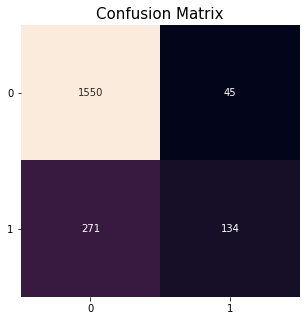

In [45]:
#Confusion matrix
cm_DF = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm_DF, annot=True,fmt='.0f',cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.yticks(rotation=0)
plt.show()

In [46]:
#Classification report summary
cr_DF = metrics.classification_report(y_test,y_pred, output_dict=True)
CS_DF = pd.DataFrame(cr_DF).transpose()
CS_DF

,precision,recall,f1-score,support
0,0.851181,0.971787,0.907494,1595.000
1,0.748603,0.330864,0.458904,405.000
accuracy,0.842000,0.842000,0.842000,0.842
macro avg,0.799892,0.651326,0.683199,2000.000
weighted avg,0.830409,0.842000,0.816655,2000.000
